In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import MultipleLocator #导入此类，设置坐标轴间隔

import numpy as np
import pandas as pd
import os
import h5py

from IPython.core.interactiveshell import InteractiveShell
# from D_paperPlot.plotConfig import *
import plotConfig as config

InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

D:\ProgramData\Miniconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\ProgramData\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\ProgramData\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [5]:
type = 'PRED'
proj_name = os.path.join('pro44', 'pred_noAM')
subjectName = 'SC4191E0' # '0d79f4b1-e74f-5e87-8e42-f9dd7112ada5'
# df_pred_dodH = pd.read_csv(f"{proj_name}/{subjectName}_PRED.npy", header=0, index_col=0)
# df_pred_dodH
pred_SC = np.load(os.path.join(proj_name, subjectName)+'_PRED.npy')
true_SC = np.load(os.path.join(proj_name, subjectName)+'_TRUE.npy')
np.sum(true_SC)
print(pred_SC.shape)
print(np.sum(pred_SC))

mat_pred_SC = pred_SC # np.array(pred_SC)
mat_true_SC = true_SC.ravel() # np.array(true_SC)
# 或np.squeeze(true_SC)

def getPred(dir, subjectName, type='PRED'):
    return np.load(os.path.join(dir, subjectName)+f'_{type}.npy')

mat_pred_SC_zoom = getPred('pro44/pred_noAM_zoom/', subjectName, 'PRED')
mat_pred_SC_zoom.shape   # ❤ 83220=2774 * 30(τ=1，即每秒一个标签)
np.sum(mat_pred_SC_zoom)
print("---- ----")
mat_true_SC_zoom = getPred('pro44/pred_noAM_zoom/', subjectName, 'TRUE')
mat_true_SC_zoom.shape
np.sum(mat_true_SC_zoom)


3461

(2774, 5)
5548.0
---- ----


(83220, 5)

166440.02

(83220,)

103830

array([[1.1645271e-03, 1.1335167e-03, 2.7656259e-03, ..., 5.7546804e-03,
        3.7768662e-03, 3.0331579e-03],
       [1.1393704e-03, 1.2556843e-03, 1.4825859e-03, ..., 1.6250178e-02,
        1.8845830e-02, 2.3752078e-02],
       [4.7160066e-03, 5.0463625e-03, 5.9305588e-03, ..., 1.6076872e-01,
        8.7797411e-02, 5.7580419e-02],
       [1.9815638e+00, 1.9815724e+00, 1.9772756e+00, ..., 1.8140221e+00,
        1.8877044e+00, 1.9122592e+00],
       [1.1416282e-02, 1.0992157e-02, 1.2545785e-02, ..., 3.2044938e-03,
        1.8755229e-03, 3.3750748e-03]], dtype=float32)

In [16]:
# pred_type = 2  # (siglen=30s * 128Hz * pred_SC.shape[0] s)
# resolution = '30'
# proj_name2 = os.path.join('pro55_0', f'pred{pred_type}', f'1_{resolution}')
# subjectName = 'SC4012E0' # 'tp0b8226b6_1f19_4c97_b140_e798f6ac52ff'#'SC4011E0'
# type = 'PRED' # 或 "TRUE"
# pred_SC = np.load(os.path.join(proj_name2, subjectName)+'_PRED.npy')
# pred_SC
# true_SC = np.load(os.path.join(proj_name2, subjectName)+'_TRUE.npy')
# np.sum(true_SC)
# # df_pred_SC = pd.read_csv(f"{proj_name2}/{subjectName}_PRED.npy", header=0, index_col=0)
# # df_pred_SC


FileNotFoundError: [Errno 2] No such file or directory: 'pro55_0\\pred2\\1_30\\SC4012E0_PRED.npy'

In [89]:
mat_pred_SC.shape

(2774, 5)

(5, 501)
(5, 501)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

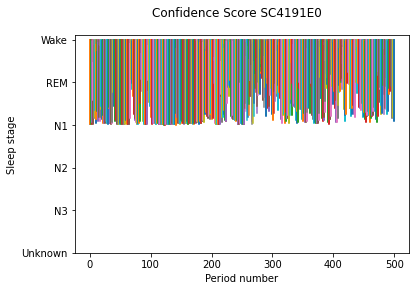

In [6]:
# # 1) imshow()
# # https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html
# def plot_confidence(y_pred, y_true=None, id_=None):
#     def format_ax(ax):
#         ax.set_xlabel("Period number")
#         ax.set_ylabel("Sleep stage")
#         ax.set_yticks(range(6))
#         ax.set_yticklabels(["Wake", "REM", "N1", "N2", "N3","Unknown"])
#         ax.invert_yaxis()
#         ax.set_xlim(1, ids[-1]+1)
#         # l = ax.legend(loc=3)
#         # l.get_frame().set_linewidth(0)
#     ids = np.arange(y_pred.shape[1])
#     ids = np.vstack([[ids]]*5) # (ids, ids, ids ,...)
#     print(ids.shape)
#     print(y_pred.shape)
#
#     if y_true is not None:
#         pass
#         # fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
#     else:
#         pass
#         # fig = plt.figure()
#         # ax1 = fig.add_subplot(111)
#
#     fig, ax1 = plt.subplots(nrows=1, sharex=True) # plt.figure()
#
#     fig.suptitle(f"Confidence Score {id_}") # ljy改15:缩短标题
#
#     # Plot predicted confidence #ljy改
#
#
#     # ax1.step(ids+1, y_pred, color="red", label="Pred") # color="darkcyan"
#     ax1.step(ids, y_pred)
#     format_ax(ax1)
#     # if y_true is not None:
#     #     plt.subplot(212)
#     #     plt.imshow(y_true)
#     #     # ax2.step(ids+1, y_true, color="blue", label="True") # darkred
#     #     # format_ax(ax2)
#     fig.subplots_adjust(hspace=10)
#     return fig, ax1
#
# def plot_and_save_confidence(out_path, y_pred, y_true=None, id_=None):
#     dir_ = os.path.split(out_path)[0]
#     if not os.path.exists(dir_):
#         os.makedirs(dir_)
#     outs = plot_confidence(y_pred, y_true, id_)
#     outs[0].savefig(out_path, dpi=180)
#     plt.close(outs[0])
#
# plot_and_save_confidence(f'output/{subjectName}_cf.png',mat_pred_SC, mat_true_SC, subjectName)

In [81]:
# 1) imshow()
# https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html

def plot_confidence(y_pred, y_true=None, id_=None,
                    start=2325, end=2356, x_gap=1):

    N = end - start + 1
    def format_ax(ax):
        ax.set_xlabel("Periods", fontsize=config.FONT_LABEL)
        ax.set_ylabel("Sleep stage", fontsize=config.FONT_LABEL)
        ax.set_yticks(range(5))
        ax.set_yticklabels(["Wake", "REM", "N1", "N2", "N3"], fontsize=config.FONT_STICK)
        plt.tick_params(labelsize=config.FONT_STICK)  # ❤ 设置tick_label——FONTSIZE
        # ax.axis('tight')
        # ax.invert_yaxis()
        # ax.set_xlim(1, ids[-1]+1)
        # l = ax.legend(loc=3)
        # l.get_frame().set_linewidth(0)
    # ids = np.arange(y_pred.shape[1])
    # ids = np.vstack([[ids]]*5) # (ids, ids, ids ,...)
    # print(ids.shape)
    # print(y_pred.shape)

    if y_true is not None:
        pass
        # fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
    else:
        pass
        # fig = plt.figure()
        # ax1 = fig.add_subplot(111)

    fig = plt.figure(figsize=(20, 4))#plt.subplots(nrows=1, sharex=True) # plt.figure()
    # plt.setp(ax1,adjustable='box')
    # fig.suptitle(f"Confidence Score {id_}") # ljy改15:缩短标题
    plt.title(f"Confidence Score {id_}", fontsize=config.FONT_TITLE) # ljy改15:缩短标题


    # ax1.step(ids+1, y_pred, color="red", label="Pred") # color="darkcyan"
    # ax1.step(ids, y_pred)
    plt.imshow(y_pred.T, interpolation='hermite')
    plt.axis('tight')  # 让图片resize

    if x_gap:
        x_major_locator=MultipleLocator(x_gap) # 每128个采样点，打一个xtick
        # x_major_locator=MultipleLocator(N/128*30) # 每128个采样点，打一个xtick
        ax=plt.gca()
        ax.xaxis.set_major_locator(x_major_locator)
        plt.tick_params(labelsize=config.FONT_STICK)  # ❤ 设置tick_label——FONTSIZE

    ax=plt.gca()
    format_ax(ax)
    # plt.gca().xaxis.set_major_formatter(FuncFormatter(changeX(ids)))

    plt.xlim([start,end])
    # plt.xscale('log')
    plt.show()
    # ax1.set_aspect(1)

    # if y_true is not None:
    #     plt.subplot(212)
    #     plt.imshow(y_true)
    #     # ax2.step(ids+1, y_true, color="blue", label="True") # darkred
    #     # format_ax(ax2)
    # fig.subplots_adjust(hspace=10)

    return fig

def plot_and_save_confidence(out_path, y_pred, y_true=None, id_=None, start=2325, end=2356, x_gap=2):
    dir_ = os.path.split(out_path)[0]
    if not os.path.exists(dir_):
        os.makedirs(dir_)
    outs = plot_confidence(y_pred, y_true, id_, start, end, x_gap=x_gap)
    outs.savefig(out_path, dpi=180)
    plt.close(outs)

In [ ]:
start1, end1 = 774, 2774
plot_and_save_confidence(f'output/pro44/{subjectName}_cf_{start1}_{end1}.png',mat_pred_SC, mat_true_SC, subjectName, start1, end1)
# plot_confidence(mat_pred_SC, mat_true_SC, subjectName)

In [ ]:
start3, end3 = 2325, 2351
plot_and_save_confidence(f'output/pro44/{subjectName}_cf_{start3}_{end3}.png',mat_pred_SC, mat_true_SC, subjectName, start3, end3)

(2774, 5)

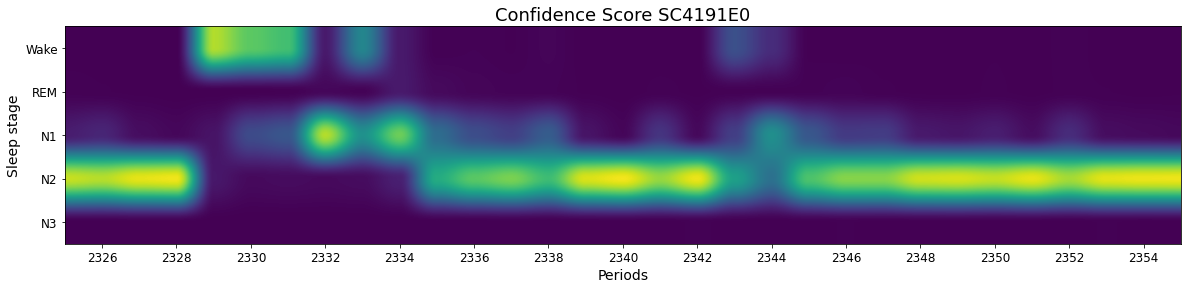

In [91]:
start3, end3 = 2325, 2355
mat_pred_SC.shape
plot_and_save_confidence(f'output/pro44/{subjectName}_cf_{start3}_{end3}.png',mat_pred_SC, mat_true_SC, subjectName, start3, end3, x_gap=2)

In [7]:
# datasets = ['dcsm', 'sedf_sc', 'phys', 'shhs']

df = pd.DataFrame(pred_SC.T, index=['W','REM','N1', 'N2', 'N3'])
df_ = df.iloc[:, 2325:2356]
df_

,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,...,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355
W,0.001382,0.003981,0.000627,0.002981,1.764159,1.491404,1.394560,0.141019,0.908725,0.136989,...,0.002644,0.004640,0.004518,0.004729,0.007531,0.002684,0.012632,0.003047,0.001275,0.003363
REM,0.013675,0.008290,0.005881,0.002753,0.002788,0.004378,0.009265,0.038123,0.017910,0.140087,...,0.020163,0.008655,0.005929,0.005605,0.009005,0.004953,0.009849,0.008038,0.005151,0.007232
N1,0.155429,0.210077,0.070660,0.038089,0.103688,0.451658,0.534636,1.768263,1.008870,1.549182,...,0.338103,0.353111,0.136736,0.114767,0.164025,0.070864,0.249739,0.069676,0.055354,0.043039
N2,1.826938,1.774229,1.917283,1.949569,0.126759,0.051867,0.061034,0.051787,0.063710,0.173347,...,1.630760,1.628685,1.846699,1.868248,1.813540,1.916202,1.723995,1.910405,1.934058,1.939825
N3,0.002576,0.003422,0.005549,0.006609,0.002606,0.000693,0.000505,0.000809,0.000785,0.000394,...,0.008330,0.004909,0.006119,0.006651,0.005899,0.005297,0.003784,0.008834,0.004162,0.006541


In [39]:
df.to_csv(f'output/pro44/{subjectName}_Pred_noArgMax.csv')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#
start = 2325
end = 2356
# N = end - start
# # Visualization defaults
# STAGE_COLORS = ['#fedcbd',
#                 '#deab8a',
#                 '#fab27b',
#                 '#f47920',
#                 '#905a3d',
#
#                 # "#9370DB", # W
#                 # "#BA55D3", # REM
#                 # "#9932CC", # N1
#                 # "#9400D3", # N2
#                 # "#4B0082", # N3
#                 "black"] # UNKNOWN
#
# WAKE = pred_SC[start:end, 0].T
# REM = pred_SC[start:end, 1].T
# N1 = pred_SC[start:end, 2].T
# N2 = pred_SC[start:end, 3].T
# N3 = pred_SC[start:end, 4].T
# # UN = pred_SC[start:end, 5].T
#
#
# d=np.sum(pred_SC[start:end, :].T, axis=0)
# ind = np.arange(N)    # the x locations for the groups
# width = 1       # the width of the bars: can also be len(x) sequence
#
# plt.figure(figsize=(20,8))
# p1 = plt.bar(ind, WAKE, width, color=STAGE_COLORS[0])#, yerr=menStd)
# p2 = plt.bar(ind, REM, width, bottom=WAKE, color=STAGE_COLORS[1])#, yerr=womenStd)
# p3 = plt.bar(ind, N1, width, bottom=WAKE+REM, color=STAGE_COLORS[2])
# p4 = plt.bar(ind, N2, width, bottom=WAKE+REM+N1, color=STAGE_COLORS[3])
# p5 = plt.bar(ind, N3, width, bottom=WAKE+REM+N1+N2, color=STAGE_COLORS[4])
# # P6 = plt.bar(ind, UN, width, bottom=N3, color=STAGE_COLORS[5])
#
# # plt.axis('off')
# plt.yticks([])
# plt.ylabel('Confidence Scores',fontsize=14)
# plt.title(f'{subjectName}',fontsize=16)
# plt.xticks(ind)
# plt.xlabel('Periods',fontsize=14)
# plt.xlim([0, N-1])
# plt.ylim([0, 2])
# # plt.yticks(np.arange(0, 2, 20))
# plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('W', 'REM', 'N1', 'N2', 'N3'), loc=1)
# plt.gca().set_xticklabels(np.arange(start,end))
#
# x_major_locator=MultipleLocator(5) # 每128个采样点，打一个xtick
# ax=plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
#
# plt.savefig(f'output/pro44/{subjectName}_scores', dpi=180)
# np.sum(df_, axis=1)
# np.sum(pred_SC[start:end, :].T, axis=0)


In [30]:
def drawConfidence2(start, end, pred_SC, subjectName,
                    isTitle=True, show_yticks=False,
                    isZoom=False, isSave=True, outdir=None):
    N = end - start
    # Visualization defaults
    STAGE_COLORS = ['#fedcbd',
                    '#deab8a',
                    '#fab27b',
                    '#f47920',
                    '#905a3d',
                    # "#9370DB", # W
                    # "#BA55D3", # REM
                    # "#9932CC", # N1
                    # "#9400D3", # N2
                    # "#4B0082", # N3
                    "black"] # UNKNOWN

    WAKE = pred_SC[start:end, 0].T
    REM = pred_SC[start:end, 1].T
    N1 = pred_SC[start:end, 2].T
    N2 = pred_SC[start:end, 3].T
    N3 = pred_SC[start:end, 4].T
    # UN = pred_SC[start:end, 5].T


    d=np.sum(pred_SC[start:end, :].T, axis=0)
    ind = np.arange(N)    # the x locations for the groups
    width = 1       # the width of the bars: can also be len(x) sequence

    fig = plt.figure(figsize=(20,4))
    p1 = plt.bar(ind, WAKE, width, color=STAGE_COLORS[0])#, yerr=menStd)
    p2 = plt.bar(ind, REM, width, bottom=WAKE, color=STAGE_COLORS[1])#, yerr=womenStd)
    p3 = plt.bar(ind, N1, width, bottom=WAKE+REM, color=STAGE_COLORS[2])
    p4 = plt.bar(ind, N2, width, bottom=WAKE+REM+N1, color=STAGE_COLORS[3])
    p5 = plt.bar(ind, N3, width, bottom=WAKE+REM+N1+N2, color=STAGE_COLORS[4])
    # P6 = plt.bar(ind, UN, width, bottom=N3, color=STAGE_COLORS[5])

    # plt.axis('off')
    if not show_yticks:
        plt.yticks([])
    plt.ylabel('Confidence Scores',fontsize=config.FONT_LABEL)
    if isTitle:
        plt.title(f'{subjectName}',fontsize=config.FONT_TITLE)
    plt.xticks(ind)
    plt.xlabel('Periods',fontsize=config.FONT_LABEL)
    plt.xlim([0, N-1])
    plt.ylim([0, 2])
    # plt.axis('tight')

    # plt.yticks(np.arange(0, 2, 20))
    plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]),
               ('W', 'REM', 'N1', 'N2', 'N3'),
               loc=1, fontsize=config.FONT_LEGEND,
               framealpha=config.LEGEND_FRAMEALPHA)

    if isZoom:
        xticklabels = np.round(np.arange(start,end) / 30, 1)
        plt.gca().set_xticklabels(xticklabels)
        # for xticklabel in xticklabels:
        #     if str(xticklabel).split('.')[1] == '0':
        #         print(xticklabel)
                # plt.vlines(x = xticklabels*30, ymin=0, ymax=2, color="red", lw=0.1) # 竖线

    else:
        plt.gca().set_xticklabels(np.arange(start,end))


    x_major_locator=MultipleLocator(5) # 每128个采样点，打一个xtick
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    plt.tick_params(labelsize=config.FONT_STICK)  # ❤ 设置tick_label——FONTSIZE
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')

    # plt.show() # 在savefig前这样会导致保存黑图！

    if isSave:
        if outdir:
            plt.savefig(f'{outdir}/{subjectName}_Z{isZoom}_{start}_{end}_scores.png', dpi=180)
        else:
            plt.savefig(f'output/pro44/{subjectName}_Z{isZoom}_{start}_{end}_scores.png', dpi=180)
    return fig, ax

(<Figure size 1440x288 with 1 Axes>,
 <AxesSubplot:title={'center':'SC4191E0'}, xlabel='Periods', ylabel='Confidence Scores'>)

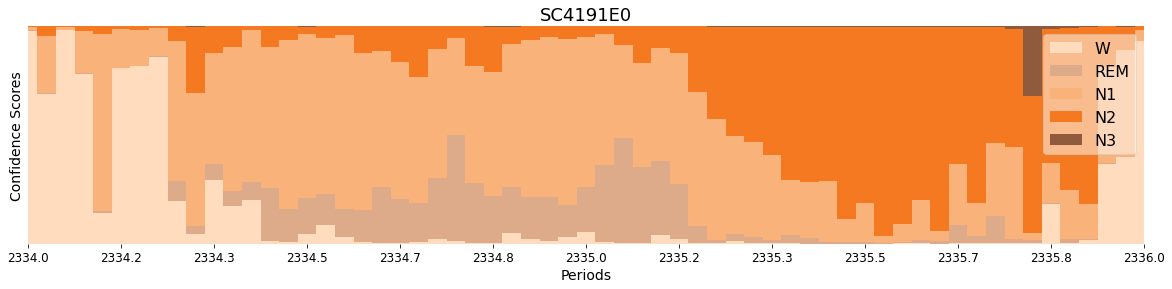

In [46]:
drawConfidence2(2334*30, 2336*30+1, mat_pred_SC_zoom, subjectName, isZoom=True)

(<Figure size 1440x288 with 1 Axes>,
 <AxesSubplot:title={'center':'SC4191E0'}, xlabel='Periods', ylabel='Confidence Scores'>)

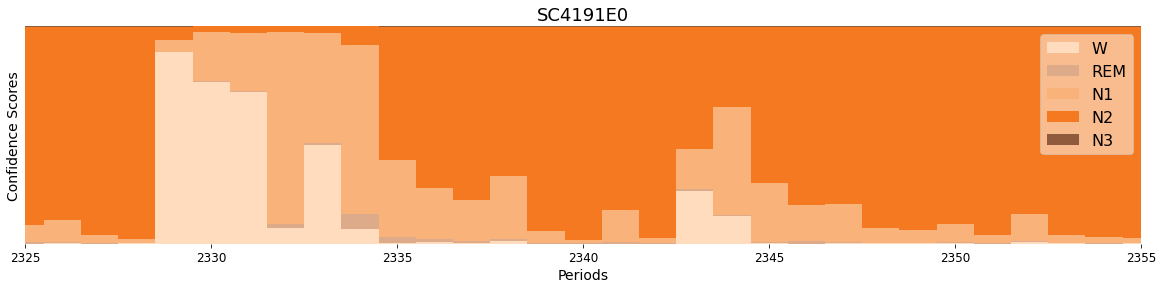

In [10]:
# mat_pred_SC = mat_pred_SC.T
# mat_pred_SC_zoom
drawConfidence2(2325, 2356, mat_pred_SC, subjectName, isZoom=False)

In [3]:
mat_pred_SC_zoom[2329*30:2330*30+1, :]
np.sum(mat_true_SC_zoom)
np.sum(mat_pred_SC_zoom)


array([[3.96684714e-04, 4.74983884e-04, 3.65018076e-03, 1.99309611e+00,
        2.38196854e-03],
       [3.98983131e-04, 4.13217000e-04, 3.30517255e-03, 1.99367917e+00,
        2.20333226e-03],
       [2.38420768e-03, 8.61334149e-04, 6.00418495e-03, 1.98333323e+00,
        7.41697010e-03],
       [8.45486075e-02, 1.32257980e-03, 9.26361419e-03, 1.90058744e+00,
        4.27778857e-03],
       [1.03772376e-02, 2.51855445e-03, 1.11380201e-02, 1.96200395e+00,
        1.39622344e-02],
       [1.79957762e-01, 2.77784979e-03, 3.86793055e-02, 1.76872921e+00,
        9.85577237e-03],
       [1.87483597e+00, 6.72842492e-04, 8.68980736e-02, 3.73851135e-02,
        2.07957666e-04],
       [1.62377131e+00, 2.80421181e-03, 2.03557193e-01, 1.65054709e-01,
        4.81254794e-03],
       [1.88475108e+00, 2.91295652e-03, 7.55641982e-02, 2.43215300e-02,
        1.24500329e-02],
       [1.32844257e+00, 7.11933151e-03, 5.37396550e-01, 1.22372277e-01,
        4.66939993e-03],
       [1.93339348e+00, 4.3131

103830

166440.02

In [11]:
f3 = h5py.File('D:/Codes/lab/dataset/processed_data_test.h5', 'r')
dict = f3['sedf_sc']['TEST'][subjectName]  # （2560,3840）
# dict['PSG'].keys()

EOG0 = dict['PSG']['EOG']  # （2774,3840）
EOG0
EEG_PzOz = dict['PSG']['Pz-Oz']
EEG_PzOz
EEG_FpzCz = dict['PSG']['Fpz-Cz']
EEG_FpzCz

<HDF5 dataset "EOG": shape (2774, 3840), type "<f4">

<HDF5 dataset "Pz-Oz": shape (2774, 3840), type "<f4">

<HDF5 dataset "Fpz-Cz": shape (2774, 3840), type "<f4">

In [58]:
def plot_signals(start, end, EEG, EOG, type1='Pz-Oz', type2='EOG',
                 subjectName='SC4191E0', isZoom=False, x_gap=0, resample_gap=1,
                 isTitle=False, isShowX=True, isShowY=True,
                 isSave=True, outdir=None, xlims=None):
    if xlims is None:
        xlims = [start, end]

    def format_ax2(ax):
        if isZoom:
            xticklabels = np.round(ind / 30, 1)
            ax.set_xticklabels(xticklabels, fontsize=config.FONT_LABEL)
        elif N > 3840*30:
            xticklabels = np.round(np.arange(start,end) / 128, 1)
            ax.set_xticklabels(xticklabels, fontsize=config.FONT_LABEL)
        # else:
            # xticklabels = np.round(ind, 1)
            # ax.set_xticklabels(xticklabels)

        if x_gap:
            x_major_locator=MultipleLocator(x_gap) # 每128个采样点，打一个xtick
            ax.xaxis.set_major_locator(x_major_locator)

        ax.axis('tight')
        ax.spines['left'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.spines['bottom'].set_color('none')
        plt.tick_params(labelsize=config.FONT_STICK)  # ❤ 设置tick_label——FONTSIZE
        plt.xlim(xlims)

    fig, (ax1, ax2) = plt.subplots(figsize=(20, 8), nrows=2, sharex=True)
    sig1 = EEG.value[start:end,::resample_gap].ravel()
    sig2 = EOG.value[start:end,::resample_gap].ravel()

    ind = np.linspace(start, end, len(sig1))
    N = len(sig1)

    ax1.plot(ind ,sig1, label=f'{type1}')
    ax1.legend(loc=1, fontsize=config.FONT_LEGEND)
    if isTitle:
        ax1.set_title(f'{subjectName} - {type1} & {type2}', fontsize=config.FONT_TITLE)
    ax2.plot(ind, sig2, label=f'{type2}')
    ax2.legend(loc=1, fontsize=config.FONT_LEGEND)

    format_ax2(ax1)
    format_ax2(ax2)


    if isShowX:
        ax2.set_xlabel("Sample points", fontsize=config.FONT_LABEL)
    else:
        ax1.set_xticklabels([])
        ax2.set_xticklabels([])

    if isShowY:
        ax1.set_ylabel("EEG(mV)", fontsize=config.FONT_LABEL)
        ax2.set_ylabel("EOG(mV)", fontsize=config.FONT_LABEL)
    else:
        ax1.set_yticklabels([])
        ax2.set_yticklabels([])

    if isSave:
        if outdir:
            plt.savefig(f'{outdir}/{subjectName}_Z{isZoom}_{start}_{end}_{type1}_{type2}_{resample_gap}.png', dpi=180)
        else:
            plt.savefig(f'output/pro44/{subjectName}_Z{isZoom}_{start}_{end}_{type1}_{type2}_{resample_gap}.png', dpi=180)

    return fig, ax1, ax2

C:\Users\AW\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:32: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
C:\Users\AW\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:33: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


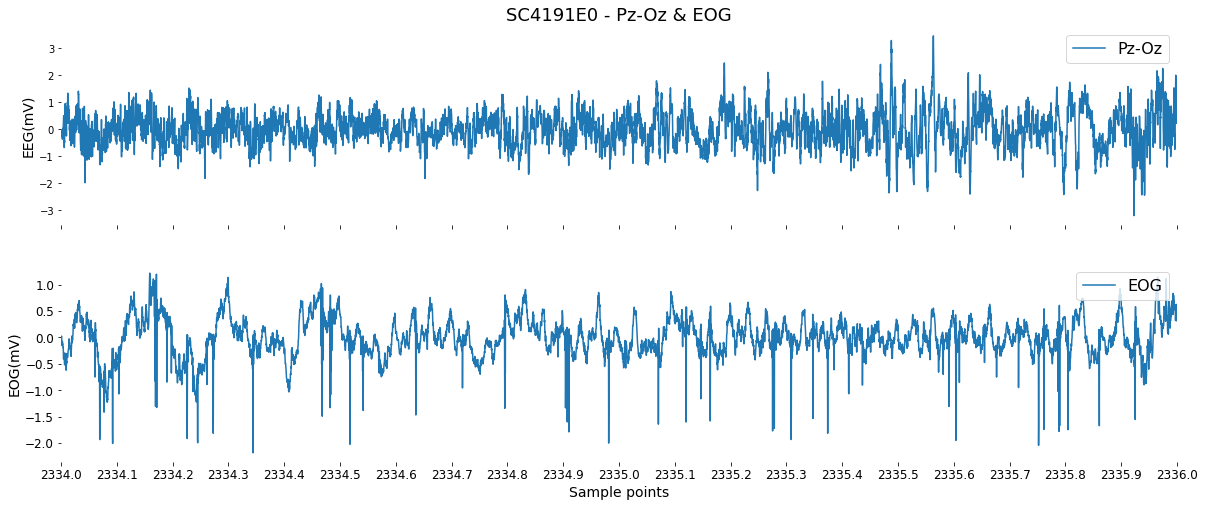

In [59]:
start3, end3 = 2334, 2336
sig1 = EEG_PzOz
sig2 = EOG0
# fig, ax_PzOz, ax_eog = plot_signals(start3, end3, sig1, sig2, type1='Pz-Oz', type2='EOG', subjectName=subjectName, isZoom=False, x_gap=0.1)
fig, ax_PzOz, ax_eog = plot_signals(start3, end3, sig1, sig2,
                                      type1='Pz-Oz', type2='EOG',
                                      subjectName=subjectName, isTitle=True,
                                      isShowX=True, isZoom=False, x_gap=0.1,
                                      isSave=True, xlims=[start3, end3])

C:\Users\AW\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:32: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
C:\Users\AW\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:33: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


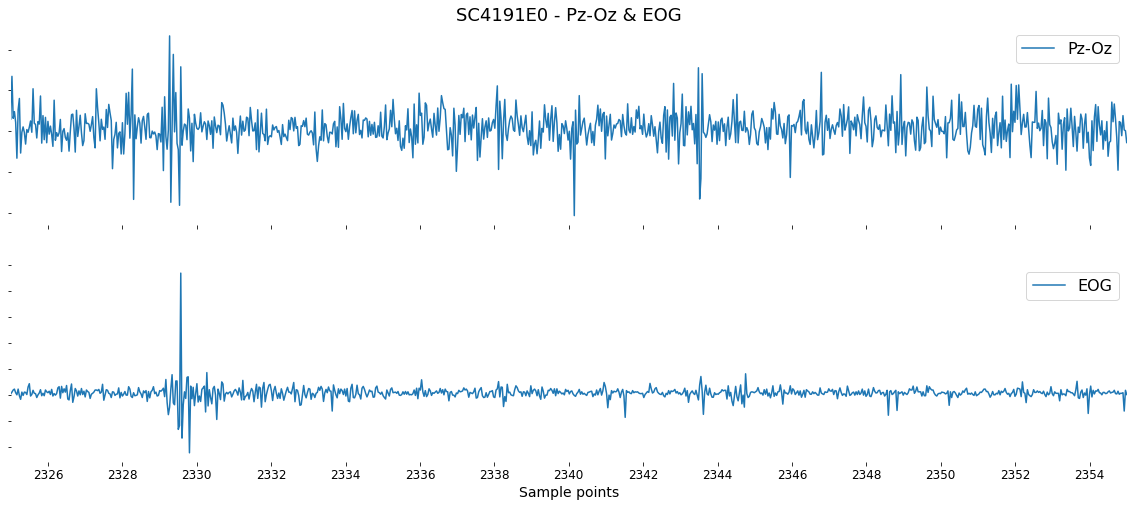

In [62]:
start3, end3 = 2325, 2356-1  # seg_len=2*maargin+1=31 Label, 每个标签30s
sig1 = EEG_PzOz
sig2 = EOG0
# fig, ax_PzOz, ax_eog = plot_signals(start3, end3, sig1, sig2, type1='Pz-Oz', type2='EOG', subjectName=subjectName, isZoom=False, x_gap=0.1)
fig, ax_PzOz, ax_eog = plot_signals(start3, end3, sig1, sig2,
                                      type1='Pz-Oz', type2='EOG',
                                      subjectName=subjectName, isTitle=True, resample_gap=128,
                                      isShowX=True, isShowY=False, isZoom=False, x_gap=2,
                                      isSave=True, xlims=[start3, end3])

In [ ]:
start3, end3 = 2325, 2356-1  # seg_len=2*maargin+1=31 Label, 每个标签30s
sig1 = EEG_PzOz
sig2 = EOG0
# fig, ax_PzOz, ax_eog = plot_signals(start3, end3, sig1, sig2, type1='Pz-Oz', type2='EOG', subjectName=subjectName, isZoom=False, x_gap=0.1)
fig, ax_PzOz, ax_eog = plot_signals(start3, end3, sig1, sig2,
                                      type1='Single-Channel EEG', type2='Single-Channel EOG',
                                      subjectName=subjectName, isTitle=True, resample_gap=128,
                                      isShowX=True, isShowY=False, isZoom=False, x_gap=2,
                                      isSave=True, xlims=[start3, end3])

In [50]:
EEG_PzOz[start3:end3, ::].shape

(31, 3840)

C:\Users\AW\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:32: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
C:\Users\AW\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:33: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


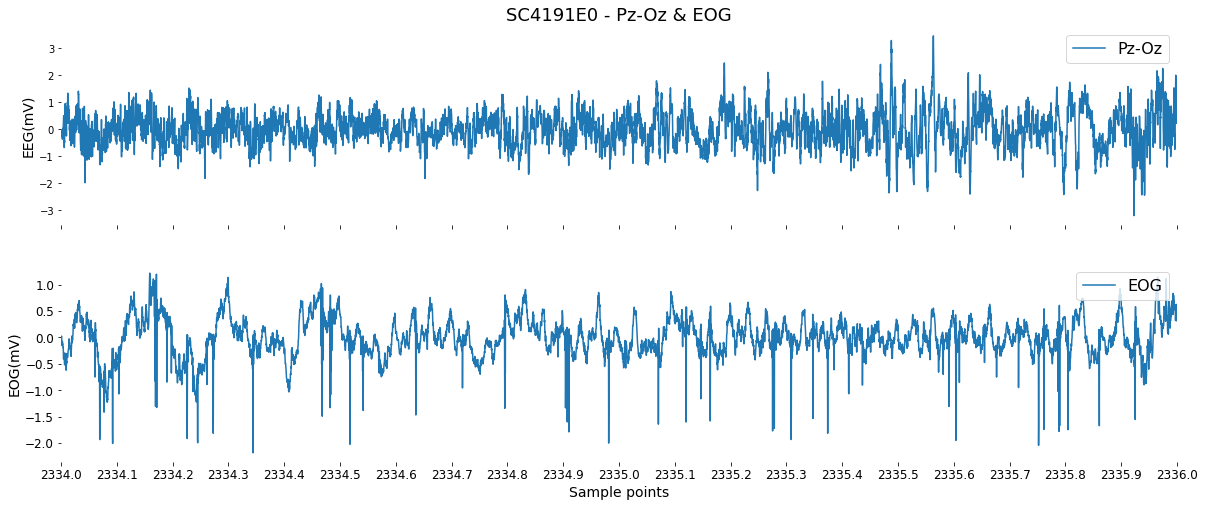

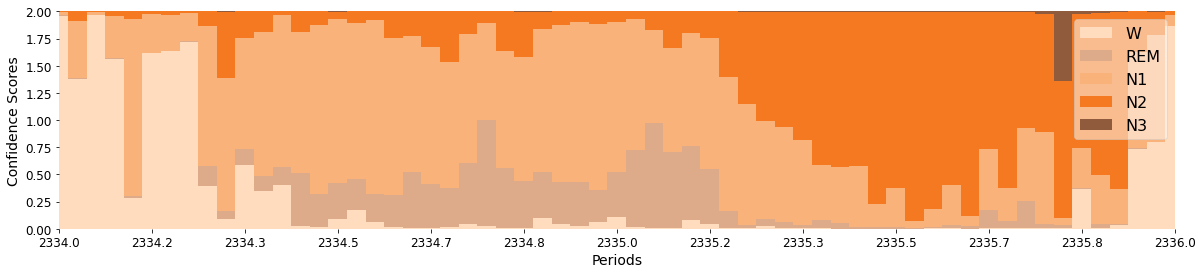

In [33]:
start_zoom=2334
end_zoom=2336

def drawConfidence_and_signals(subjectName, isZoom=False, isSave=True, outdir=None):

    # def plot_and_save_confidence(out_path, y_pred, y_true=None, id_=None):
    #     dir_ = os.path.split(out_path)[0]
    #     if not os.path.exists(dir_):
    #         os.makedirs(dir_)
    #     outs = plot_confidence(y_pred, y_true, id_)
    #     outs[0].savefig(out_path, dpi=180)
    #     plt.close(outs[0])

    fig12, ax_PzOz, ax_eog = plot_signals(start_zoom, end_zoom, sig1, sig2,
                                      type1='Pz-Oz', type2='EOG', resample_gap=1,
                                      subjectName=subjectName, isTitle=True,
                                      isShowX=True, isZoom=False, x_gap=0.1,
                                      isSave=True, xlims=[start_zoom, end_zoom])

    fig3, ax_score = drawConfidence2(start_zoom*30, end_zoom*30+1, mat_pred_SC_zoom,
                                     subjectName, isZoom=True, isSave=True,
                                     show_yticks=True,
                                     isTitle=False)

    #
    # fig, axes = plt.subplots(figsize=(20, 4*3), nrows=3)
    # axes[0] = fig.add_subplot(311)
    # axes[0] = ax_PzOz
    # axes[1] = ax_eog
    # axes[2] = ax_score
    # fig =
    # plt.show()

    # if isSave:
    #     if outdir:
    #         plt.savefig(f'{outdir}/{subjectName}_Z{isZoom}_{start}_{end}_{type1}_{type2}.png', dpi=180)
    #     else:
    #         plt.savefig(f'output/pro44/{subjectName}_Z{isZoom}_{start}_{end}_{type1}_{type2}.png', dpi=180)
    #
    # return fig, axes

drawConfidence_and_signals(subjectName)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)

array([3, 3, 3, 3, 0, 0, 0, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)

77

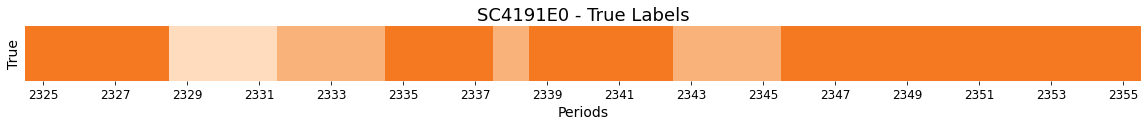

In [67]:
start, end = 2325, 2356
mat_true_SC_zoom[2334*30: 2336*30-1, ]
mat_true_SC[start: end, ]
np.sum(mat_true_SC[start: end, ])

def drawConfidence2_True(start, end, pred_SC, subjectName, type='True', isZoom=False, outdir=None, x_gap=5):
    # Visualization defaults
    import matplotlib.colors as col
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    import numpy as np

    map_Stages = {0: "W", 1: "REM", 2: "N1", 3: "N2", 4: "N3", 5:"UNKNOWN"}

    STAGE_COLORS = ['#fedcbd',
                    '#deab8a',
                    '#fab27b',
                    '#f47920',
                    '#905a3d',
                    # "#9370DB", # W
                    # "#BA55D3", # REM
                    # "#9932CC", # N1
                    # "#9400D3", # N2
                    # "#4B0082", # N3
                    "black"] # UNKNOWN


    N = end - start
    # 法1：label = np.expand_dims(pred_SC.ravel()[start:end, ], 0)
    # 法2：reshape(1, len)
    label = pred_SC[start:end, ].reshape(1, -1)
    # label_ = []
    # for ll in label:
    #     label_.append(map_Stages.get(ll))
    # label_ = np.array(label_)
    #
    # maxStage =  np.max(label)
    cmap2 = col.LinearSegmentedColormap.from_list("STAGE_COLORS", STAGE_COLORS)


    # aa = np.zeros(shape=label.shape)
    # d=np.sum(pred_SC[start:end, ], axis=0)
    ind = np.arange(N)    # the x locations for the groups
    # width = 1       # the width of the bars: can also be len(x) sequence

    plt.figure(figsize=(20,1))
    plt.imshow(label, cmap=cmap2)
    # plt.colorbar()
    plt.clim(0, 5)  # 设置colorbar的色域(5分类 - 0~5(UNKnown))


    # plt.axis('off')
    plt.yticks([])
    # plt.ylabel(f'{type} Labels',fontsize=14)
    plt.title(f'{subjectName} - {type} Labels',fontsize=config.FONT_TITLE)
    plt.xticks(ind)
    plt.xlabel('Periods',fontsize=config.FONT_LABEL)
    plt.ylabel('True',fontsize=config.FONT_LABEL)
    plt.xlim([0, N-1])
    plt.ylim([0, 2])

    # ax.set_yticks(range(6))
    # plt.gca.set_yticklabels(["Wake", "REM", "N1", "N2", "N3","Unknown"])

    # plt.yticks(np.arange(0, 2, 20))
    # plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('W', 'REM', 'N1', 'N2', 'N3'), loc=1)

    if isZoom:
        xticklabels = np.round(np.arange(start,end) / 30, 1)
        plt.gca().set_xticklabels(xticklabels)
        for xticklabel in xticklabels:
            if str(xticklabel).split('.')[1] == '0':
                pass
                # print(xticklabel)
                # plt.vlines(x = xticklabels*30, ymin=0, ymax=2, color="red", lw=0.1) # 竖线

    else:
        plt.gca().set_xticklabels(np.arange(start,end))

    x_major_locator=MultipleLocator(x_gap) # 每128个采样点，打一个xtick
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    plt.tick_params(labelsize=config.FONT_STICK)  # ❤ 设置tick_label——FONTSIZE

    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    # plt.show() # 在savefig前这样会导致保存黑图！
    plt.axis('tight')  # 让图片resize

    if outdir:
        plt.savefig(f'{outdir}/{subjectName}_Z{isZoom}_{type}_{start}_{end}.png',
                    dpi=180, bbox_inches='tight') # ❤防止上下title/label显示不全
    else:
        plt.savefig(f'output/pro44/{subjectName}_Z{isZoom}_{type}_{start}_{end}.png',
                    dpi=180, bbox_inches='tight')

drawConfidence2_True(start, end, mat_true_SC, subjectName, type='True', isZoom=False, x_gap=2)


In [68]:
mat_pred_SC.shape
mat_true_SC.shape
np.sum(mat_true_SC)
np.sum(mat_pred_SC)


(2774, 5)

(2774,)

3461

5548.0

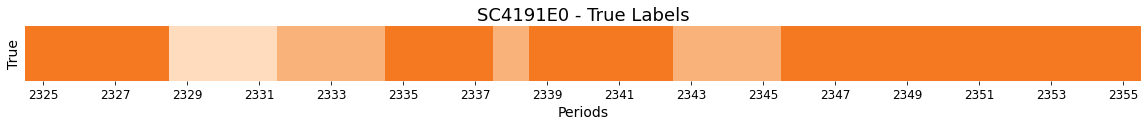

In [70]:
start3 = 2325
end3 = 2356 # n_seg = 31
drawConfidence2_True(start3, end3, mat_true_SC, subjectName, type='True', isZoom=False, x_gap=2)

(2774,)

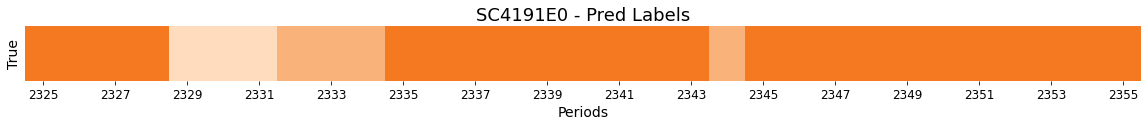

In [72]:
# mat_pred_SC_AM = getPred('pro44/pred_noAM_zoom/', subjectName, 'PRED')
# mat_pred_SC_AM.shape
# drawConfidence2_True(start3*30, end3*30+1, mat_pred_SC_AM, subjectName, type='Pred', isZoom=True, x_gap=30)
#
# drawConfidence2_True(start3*30, end3*30+1, mat_pred_SC_AM, subjectName, type='Pred', isZoom=True)

mat_pred_SC_AM = getPred('pro44/pred', subjectName, 'PRED')
mat_pred_SC_AM.shape
drawConfidence2_True(start3, end3, mat_pred_SC_AM, subjectName, type='Pred', isZoom=False, x_gap=2)
# drawConfidence2_True(start3, end3, mat_pred_SC_AM, subjectName, type='Pred', isZoom=False)

In [75]:
def drawConfidence2_TrueAndPred(start, end, pred_SC, true_SC, subjectName, isZoom=False, outdir=None, x_gap=5, axis_type='equal'):
    import matplotlib.colors as col
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    import numpy as np

    def format_ax2(ax):
        if isZoom:
            xticklabels = np.round(np.arange(start,end) / 30, 1)
            ax.set_xticklabels(xticklabels, fontsize=config.FONT_STICK)
            # for xticklabel in xticklabels:
            #     if str(xticklabel).split('.')[1] == '0':
            #         print(xticklabel)
                    # plt.vlines(x = xticklabels*30, ymin=0, ymax=2, color="red", lw=0.1) # 竖线
        # elif N > 1000:
            # xticklabels = np.round(np.arange(start,end) / 128, 1)
            # ax.set_xticklabels(xticklabels)
        else:
            ax.set_xticklabels(np.arange(start,end), fontsize=config.FONT_STICK)

        x_major_locator=MultipleLocator(x_gap) # 每128个采样点，打一个xtick
        ax.axis('tight')
        ax.xaxis.set_major_locator(x_major_locator)
        plt.tick_params(labelsize=config.FONT_STICK)  # ❤ 设置tick_label——FONTSIZE
        ax.spines['left'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.spines['bottom'].set_color('none')

    N = end - start
    # Visualization defaults
    STAGE_COLORS = ['#fedcbd',
                    '#deab8a',
                    '#fab27b',
                    '#f47920',
                    '#905a3d',
                    # "#9370DB", # W
                    # "#BA55D3", # REM
                    # "#9932CC", # N1
                    # "#9400D3", # N2
                    # "#4B0082", # N3
                    "black"] # UNKNOWN

    WAKE = pred_SC[start:end, 0].T
    REM = pred_SC[start:end, 1].T
    N1 = pred_SC[start:end, 2].T
    N2 = pred_SC[start:end, 3].T
    N3 = pred_SC[start:end, 4].T
    # UN = pred_SC[start:end, 5].T

    d=np.sum(pred_SC[start:end, :].T, axis=0)
    ind = np.arange(N)    # the x locations for the groups
    width = 1       # the width of the bars: can also be len(x) sequence

    # fig1
    # fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
    fig = plt.figure(figsize=(20,8)) # plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(211)
    plt.title(f'{subjectName} - Pred & True Labels',fontsize=config.FONT_TITLE)


    p1 = ax1.bar(ind, WAKE, width, color=STAGE_COLORS[0])#, yerr=menStd)
    p2 = ax1.bar(ind, REM, width, bottom=WAKE, color=STAGE_COLORS[1])#, yerr=womenStd)
    p3 = ax1.bar(ind, N1, width, bottom=WAKE+REM, color=STAGE_COLORS[2])
    p4 = ax1.bar(ind, N2, width, bottom=WAKE+REM+N1, color=STAGE_COLORS[3])
    p5 = ax1.bar(ind, N3, width, bottom=WAKE+REM+N1+N2, color=STAGE_COLORS[4])
    # P6 = plt.bar(ind, UN, width, bottom=N3, color=STAGE_COLORS[5])
    format_ax2(ax1)

    plt.axis('tight')
    plt.yticks([])
    plt.ylabel('Confidence Scores',fontsize=config.FONT_LABEL)
    # plt.xticks(ind)
    # plt.xlabel('Periods',fontsize=14)
    # plt.xlim([0, N-1])
    plt.ylim([0, 2])
    # plt.yticks(np.arange(0, 2, 20))
    ax1.legend((p1[0], p2[0], p3[0], p4[0], p5[0]),
               ('W', 'REM', 'N1', 'N2', 'N3'),
               loc=1, fontsize=config.FONT_LEGEND,
               framealpha=config.LEGEND_FRAMEALPHA,
               # shadow=True
               )

    # fig = plt.figure(figsize=(20,8)) # plt.figure(figsize=(20,8))
    ax2 = fig.add_subplot(212, sharex=ax1)  # 与ax1的x轴共享

    # 法1：label = np.expand_dims(pred_SC.ravel()[start:end, ], 0)
    # 法2：reshape(1, len)
    label = true_SC[start:end, ].reshape(1, -1)
    # label_ = []
    # for ll in label:
    #     label_.append(map_Stages.get(ll))
    # label_ = np.array(label_)
    #
    maxStage =  np.max(label)
    cmap2 = col.LinearSegmentedColormap.from_list("STAGE_COLORS", STAGE_COLORS[:maxStage+1])
    ind = np.arange(N)    # the x locations for the groups
    # width = 1       # the width of the bars: can also be len(x) sequence

    # plt.figure(figsize=(20,4))
    ax2.imshow(label, cmap=cmap2)
    # plt.colorbar()
    # plt.clim(0, 5)  # 设置colorbar的色域(5分类 - 0~5(UNKnown))
    # fig.subplots_adjust(bottom=0.1)

    plt.yticks([])
    plt.ylabel(f'True',fontsize=config.FONT_LABEL)
    plt.xlim([0, N-1])
    plt.ylim([0, 2])
    plt.xticks(ind)
    plt.xlabel('Periods',fontsize=config.FONT_LABEL)
    plt.xlim([0, N-1])

    # ax.set_yticks(range(6))
    # plt.gca.set_yticklabels(["Wake", "REM", "N1", "N2", "N3","Unknown"])

    # plt.yticks(np.arange(0, 2, 20))
    # plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('W', 'REM', 'N1', 'N2', 'N3'), loc=1)


    # fig1 & fig2

    plt.xlabel('Periods',fontsize=config.FONT_LABEL)
    # fig.subplots_adjust(hspace=0.1)
    ax2.axis(axis_type) # equal/tight
    ax2.set_adjustable('box')
    format_ax2(ax2)


    # plt.show() # 在savefig前这样会导致保存黑图！

    if outdir:
        plt.savefig(f'{outdir}/{subjectName}_Z{isZoom}_{start}_{end}_ALL.png',
                    dpi=180, bbox_inches='tight') # ❤防止上下title/label显示不全

    else:
        plt.savefig(f'output/pro44/{subjectName}_Z{isZoom}_{start}_{end}_ALL.png',
                    dpi=180, bbox_inches='tight') # ❤防止上下title/label显示不全

C:\Users\AW\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


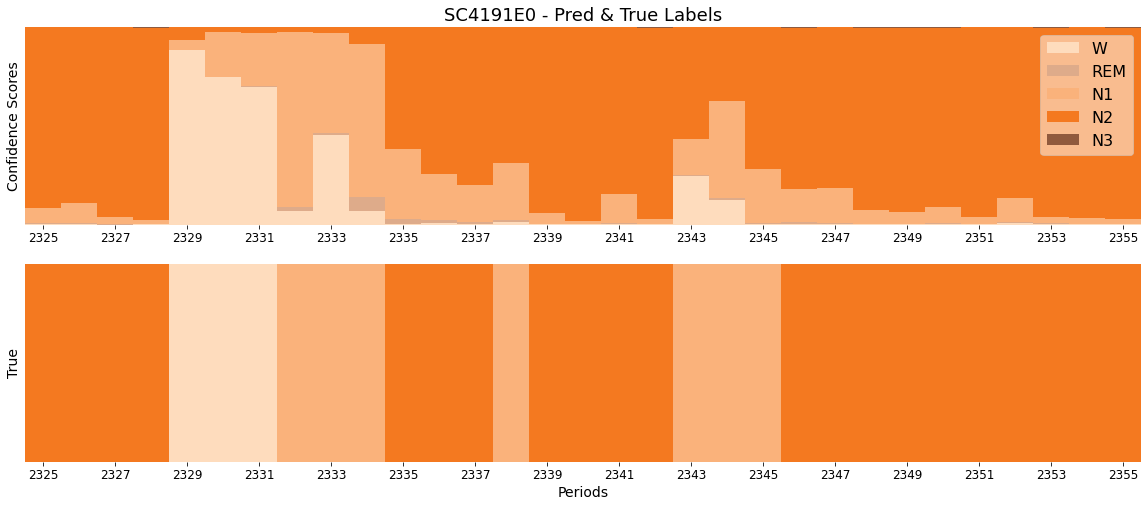

In [76]:
start=2325
end=2356
drawConfidence2_TrueAndPred(start, end, mat_pred_SC, mat_true_SC, subjectName, isZoom=False, x_gap=2, axis_type='tight')

C:\Users\AW\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


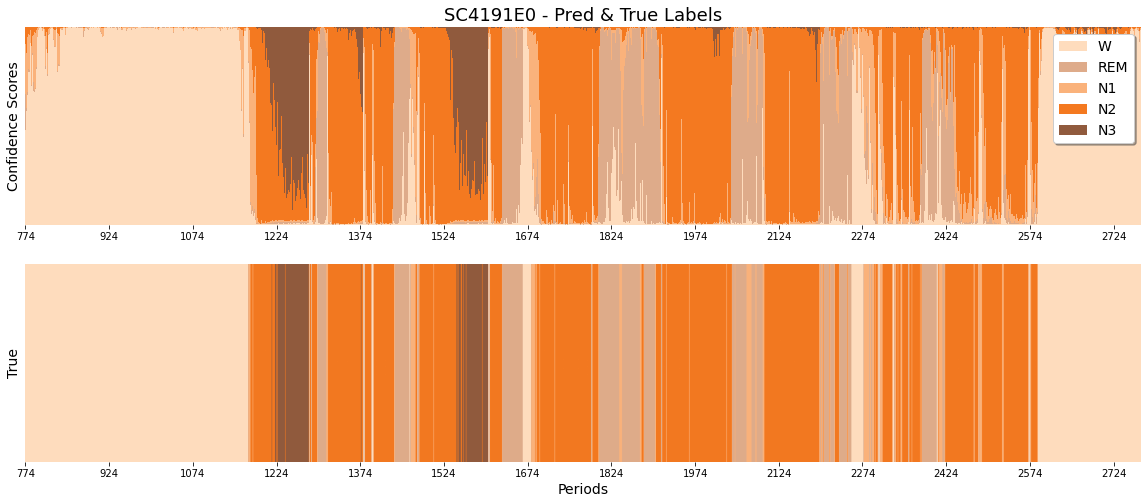

In [12]:
start1, end1 = 774, 2774
start, end = 2325, 2351
drawConfidence2_TrueAndPred(start1, end1, mat_pred_SC, mat_true_SC, subjectName, isZoom=False, x_gap=30*5, axis_type='tight')